# Цель работы: 
Применить библиотеки  sсikit-learn и mglearn  для построения моделей классификации и  регрессии. Изучить полученные данные, научиться оценивать качество моделей

## Задача:
Загрузить и вернуть набор данных диабета 
Построить модели регрессии (KNeighborsRegressor, LinearRegression, Ridge, Lasso, LogisticRegression) для полученных датасетов

In [94]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import mglearn
import mglearn.datasets

In [95]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print("Ключи diabetes: \n{}".format(diabetes.keys()))

print("Форма массива data для набора diabetes: {}".format(diabetes.data.shape))

print("Количество примеров в наборе данных о диабете: {}".format(len(diabetes.target)))

print("Имена признаков:\п{}".format(diabetes.feature_names))

Ключи diabetes: 
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
Форма массива data для набора diabetes: (442, 10)
Количество примеров в наборе данных о диабете: 442
Имена признаков:\п['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [96]:
print("Ответы: \n{}".format(diabetes['target']))

Ответы: 
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 12

In [97]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## Модель регрессии KNeighborsRegressor

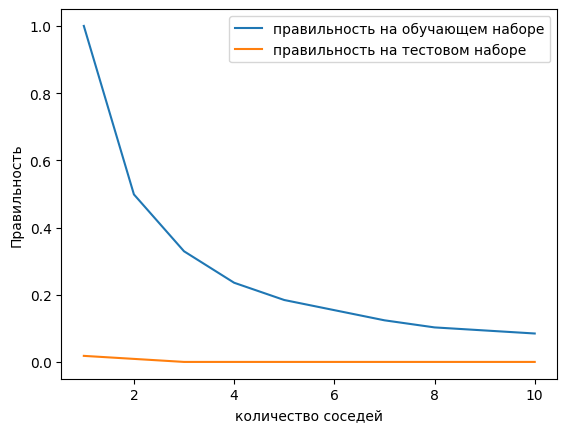

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=66)
training_accuracy = []
test_accuracy = []
# пробуем n neighbors от 1 до 10
neighbors_settings = range (1, 11)
for n_neighbors in neighbors_settings:
# строим модель
    clf = KNeighborsClassifier (n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # записываем правильность на обучающем наборе
    training_accuracy.append(clf.score(X_train, y_train))
# записываем правильность на тестовом наборе
    test_accuracy.append(clf.score (X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="правильность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="правильность на тестовом наборе")
plt.ylabel ("Правильность")
plt.xlabel("количество соседей")
plt.legend()

R^2 на тестовом наборе: 0.26


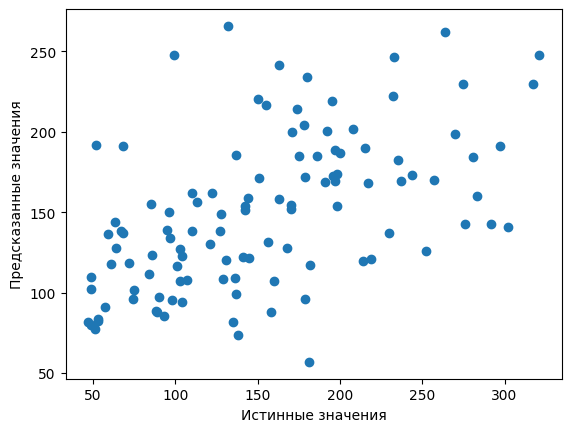

In [99]:
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsRegressor

# Загрузка набора данных о диабете
diabetes = load_diabetes()

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=0)

# Создание и обучение модели KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=9)  # Примерное количество соседей
regressor.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred = regressor.predict(X_test)

# Вывод результата
print("R^2 на тестовом наборе: {:.2f}".format(regressor.score(X_test, y_test)))

# Визуализация прогнозов
plt.scatter(y_test, y_pred)
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.show()


Значение R^2 = 0.26 говорит о том, что модель KNeighborsRegressor объясняет всего 26% изменчивости в данных о диабете. Это может означать, что модель может быть недостаточно сложной для хорошего предсказания данных, или данные могут иметь сложную структуру, которую модель не улавливает.

## Модель регрессии LinearRegression

Коэффициент детерминации R^2 на тестовом наборе: 0.36


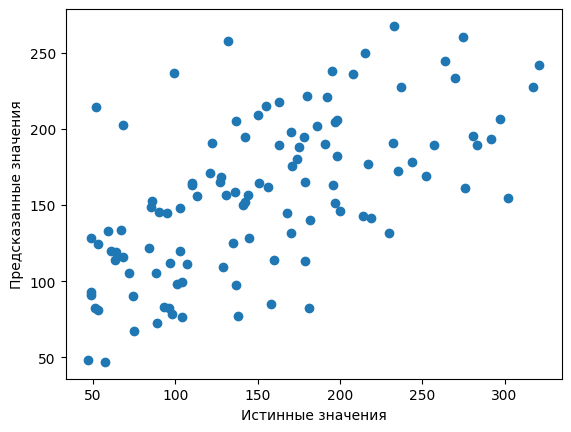

In [100]:
from sklearn.linear_model import LinearRegression

# Создание и обучение модели линейной регрессии
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred = regressor.predict(X_test)

# Оценка производительности модели
r_squared = regressor.score(X_test, y_test)
print("Коэффициент детерминации R^2 на тестовом наборе: {:.2f}".format(r_squared))

# Визуализация результатов
plt.scatter(y_test, y_pred)
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.show()


Коэффициент детерминации R^2 на тестовом наборе данных равный 0.36 говорит о том, что модель линейной регрессии объясняет приблизительно 36% изменчивости в данных о диабете. Это означает, что модель не очень хорошо предсказывает зависимость целевой переменной от признаков.

## Гребная регрессия(Ridge)

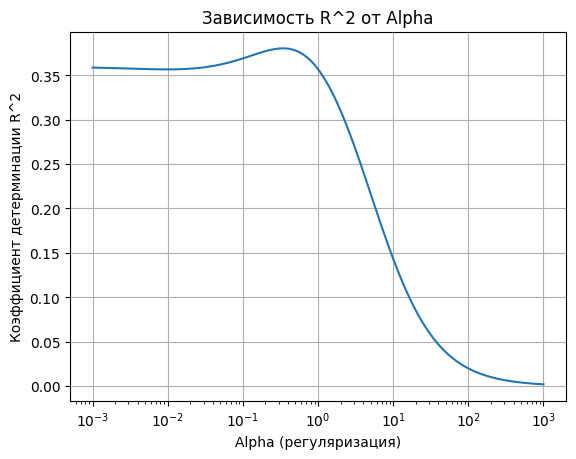

In [101]:
from sklearn.linear_model import Ridge

alphas = np.logspace(-3, 3, 100)  # Создание 100 значений alpha в логарифмической шкале

# Создание пустых списков для хранения коэффициентов детерминации R^2
r_squared_values = []

# Перебор различных значений alpha
for alpha in alphas:
    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X_train, y_train)
    r_squared = ridge_regressor.score(X_test, y_test)
    r_squared_values.append(r_squared)

# Визуализация зависимости R^2 от alpha
plt.semilogx(alphas, r_squared_values)
plt.xlabel("Alpha (регуляризация)")
plt.ylabel("Коэффициент детерминации R^2")
plt.title("Зависимость R^2 от Alpha")
plt.grid(True)
plt.show()


Исходя из этого графика мы решили задать Alpha 0.5

Коэффициент детерминации R^2 на тестовом наборе: 0.38


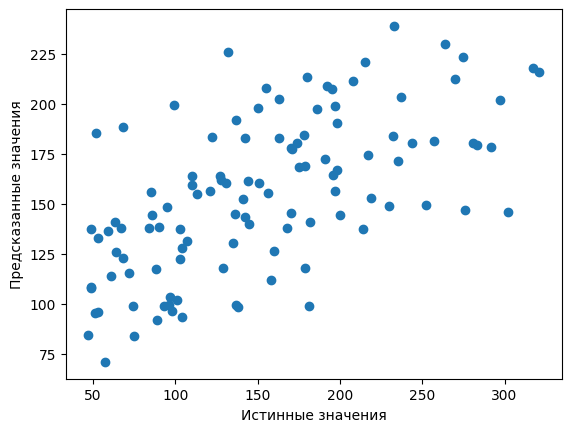

In [102]:
ridge_regressor = Ridge(alpha=0.5)  # alpha - параметр регуляризации
ridge_regressor.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred = ridge_regressor.predict(X_test)

# Оценка производительности модели
r_squared = ridge_regressor.score(X_test, y_test)
print("Коэффициент детерминации R^2 на тестовом наборе: {:.2f}".format(r_squared))

# Визуализация результатов
plt.scatter(y_test, y_pred)
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.show()


 В данном случае значение R^2 = 0.38 говорит о том, что модель Ridge улучшила производительность по сравнению с исходной линейной регрессией.

## Модель регрессии Лассо

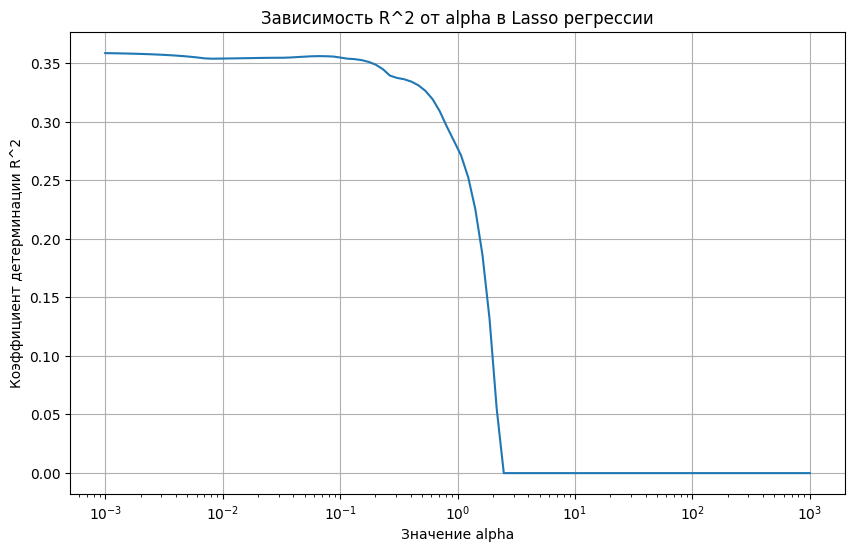

In [103]:
from sklearn.linear_model import Lasso

# Задаем различные значения alpha для тестирования
alphas = np.logspace(-3, 3, 100) 

# Инициализация списков для сохранения результатов
r_squared_values = []

# Перебор разных значений alpha
for alpha in alphas:
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)
    r_squared = lasso_regressor.score(X_test, y_test)
    r_squared_values.append(r_squared)

# Построение графика
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, r_squared_values)
plt.xlabel("Значение alpha")
plt.ylabel("Коэффициент детерминации R^2")
plt.title("Зависимость R^2 от alpha в Lasso регрессии")
plt.grid()
plt.show()


Исходя из этого графика мы решили задать Alpha 0.1

Коэффициент детерминации R^2 на тестовом наборе: 0.36


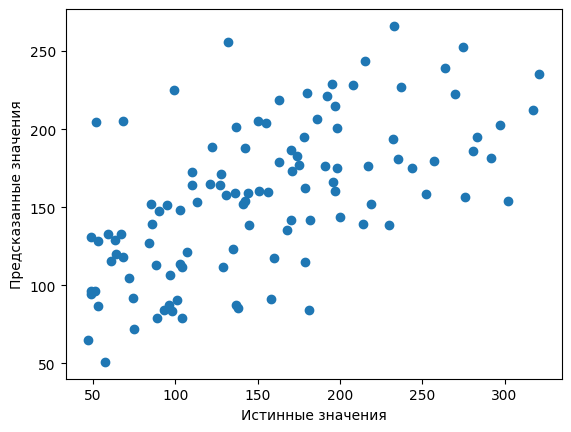

In [104]:
from sklearn.linear_model import Lasso

# Создание и обучение модели регрессии Lasso
lasso_regressor = Lasso(alpha=0.1)  # alpha - параметр регуляризации
lasso_regressor.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred = lasso_regressor.predict(X_test)

# Оценка производительности модели
r_squared = lasso_regressor.score(X_test, y_test)
print("Коэффициент детерминации R^2 на тестовом наборе: {:.2f}".format(r_squared))

# Визуализация результатов
plt.scatter(y_test, y_pred)
plt.xlabel("Истинные значения")
plt.ylabel("Предсказанные значения")
plt.show()

## Построение модели LogisticRegression

In [105]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, stratify = diabetes.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg.score (X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score (X_test, y_test)))

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

Эта ошибка связана с тем, что один из классов в вашем целевом наборе данных имеет слишком мало экземпляров, и модель классификации не может корректно обучиться.


Это следствие того что LogisticRegression является моделью классификации, предназначенной для решения задач бинарной классификации, где целевая переменная принимает одно из двух классов. Однако набор данных "load_diabetes" используется для задачи регрессии, а не классификации. Поэтому модель LogisticRegression не является подходящим выбором для этой задачи.

# Сравнение результатов:

KNeighborsRegressor:
* Коэффициент детерминации R^2 на тестовом наборе: 0.26

LinearRegression:
* Коэффициент детерминации R^2 на тестовом наборе: 0.36

Ridge Regression:
* Коэффициент детерминации R^2 на тестовом наборе: 0.38

Lasso Regression:
* Коэффициент детерминации R^2 на тестовом наборе: 0.36

Эти результаты показывают, что Ridge Regression достигает наилучшей производительности среди 4x моделей на данном наборе данных. Однако разница в производительности между моделями не слишком велика

# Вывод:

Мы проверили на 4 моделях и можем сделать вывод что выбор модели зависит от целей задачи и особенностей данных, и его следует принимать с учетом конкретных требований и ограничений.